In [ ]:
# import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('C:\GIT\GROUP__3\DATA\healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Giải thích ý nghĩa các cột trong tập dữ liệu**

| Tên cột              | Ý nghĩa |
|----------------------|--------|
| `id`                 | Mã định danh duy nhất của mỗi cá nhân |
| `gender`             | Giới tính của cá nhân (`Male`, `Female`, hoặc `Other`) |
| `age`                | Tuổi của cá nhân (tính theo năm) |
| `hypertension`       | Tăng huyết áp (0 = Không, 1 = Có) |
| `heart_disease`      | Bệnh tim (0 = Không, 1 = Có) |
| `ever_married`       | Đã từng kết hôn hay chưa (`Yes`, `No`) |
| `work_type`          | Loại hình công việc (`Private`, `Self-employed`, `Govt_job`, `children`, `Never_worked`) |
| `Residence_type`     | Loại nơi cư trú (`Urban` = thành thị, `Rural` = nông thôn) |
| `avg_glucose_level`  | Mức đường huyết trung bình (mg/dL) |
| `bmi`                | Chỉ số khối cơ thể (Body Mass Index) |
| `smoking_status`     | Tình trạng hút thuốc (`formerly smoked`, `never smoked`, `smokes`, `Unknown`) |
| `stroke`             | Đã từng bị đột quỵ hay chưa (0 = Không, 1 = Có) |

mục tiêu là dự đoán bệnh nhân có mắc đột quy hay không, nếu đột quỵ thì stroke = 1 và không đột quỵ thì stroke = 0, đây là bài toán phân lớp

## hiểu dữ liệu

In [3]:
#kiểm tra kiểu dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# kiểm tra dữ liệu dữ trùng lặp
df.duplicated().sum()

np.int64(0)

In [5]:
#xem dữ liệu thiếu
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# xem thống kê cơ bản
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Tổng quan thống kê mô tả**

Bảng thống kê mô tả dưới đây phản ánh các đặc trưng cơ bản của bộ dữ liệu bệnh nhân, bao gồm 7 biến định lượng và 3 biến nhị phân. Dưới đây là phân tích chi tiết:


**Tuổi (age)**

- Trung bình: 43.23 tuổi  
- Độ lệch chuẩn (std): 22.61  
- Giá trị nhỏ nhất: 0.08 tuổi (khoảng 1 tháng) — cân nhắc làm tròn tuổi (ví dụ 0.08 = 1 tuổi,...)  
- Phân vị:
  - 25% ≤ 25 tuổi
  - 75% ≤ 61 tuổi  
  → Phân bố có vẻ lệch phải (phần lớn là người trẻ)

**Tăng huyết áp (hypertension) & Bệnh tim (heart_disease)**

- Là các biến nhị phân (0/1)
- Tỷ lệ người bị tăng huyết áp: ~9.75%  
- Tỷ lệ người mắc bệnh tim: ~5.4%  
→ Tỷ lệ này khá thấp, phân bố mất cân bằng, cần lưu ý nếu xây dựng mô hình học máy

**Mức đường huyết trung bình (avg_glucose_level)**

- Trung bình: 106.15 mg/dL  
- Độ lệch chuẩn: 45.28  
- Giá trị tối đa: 271.74 — có thể là outlier  
- 75% dữ liệu ≤ 114.09  
→ Phân bố có dấu hiệu lệch phải, nên chuẩn hóa hoặc biến đổi log nếu dùng trong mô hình

**Chỉ số BMI (bmi)**

- Trung bình: 28.89 — nằm trong ngưỡng tiền béo phì theo chuẩn WHO  
- Số lượng quan sát hợp lệ: 4909/5110 → khoảng 3.9% thiếu dữ liệu  
- Giá trị tối đa: 97.6 — cao bất thường, khả năng là outlier  
→ Cần xử lý missing values và kiểm tra outliers

**Đột quỵ (stroke)**

- Biến mục tiêu nhị phân  
- Tỷ lệ đột quỵ: 4.87%  
→ Class imbalance nghiêm trọng, cần các kỹ thuật xử lý như oversampling, SMOTE, hoặc điều chỉnh trọng số trong mô hình

**Kết luận**

- **Kiểm tra outliers**: đặc biệt ở các biến `age`, `avg_glucose_level`, `bmi`
- **Xử lý missing values**: biến `bmi` cần bổ sung hoặc ước lượng dữ liệu thiếu
- **Xử lý class imbalance**: biến mục tiêu `stroke` cần được cân bằng bằng các kỹ thuật phù hợp
- **Chuẩn hóa dữ liệu**: nên thực hiện chuẩn hóa hoặc feature scaling với các biến định lượng để đảm bảo hiệu quả mô hình hóa

In [8]:
# thống kê các cột phân loại
categorical=df.select_dtypes(include=object)
categorical.describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
# kiểm tra số lượng giá trị duy nhất mỗi cột
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

- thông qua việc kiểm tra giá trị duy nhất ta có thể thấy đưọc bất thường ở cột gender: thay vì chỉ có male và female thì xuất hiện thêm 1 giá trị khác.

- độ tuổi bé nhất là 0.08 và lớn nhất là 82 tuổi, mà ở cột age có tới 104 giá trị khác biệt tức là do nhập liệu sai (cần xử lí).

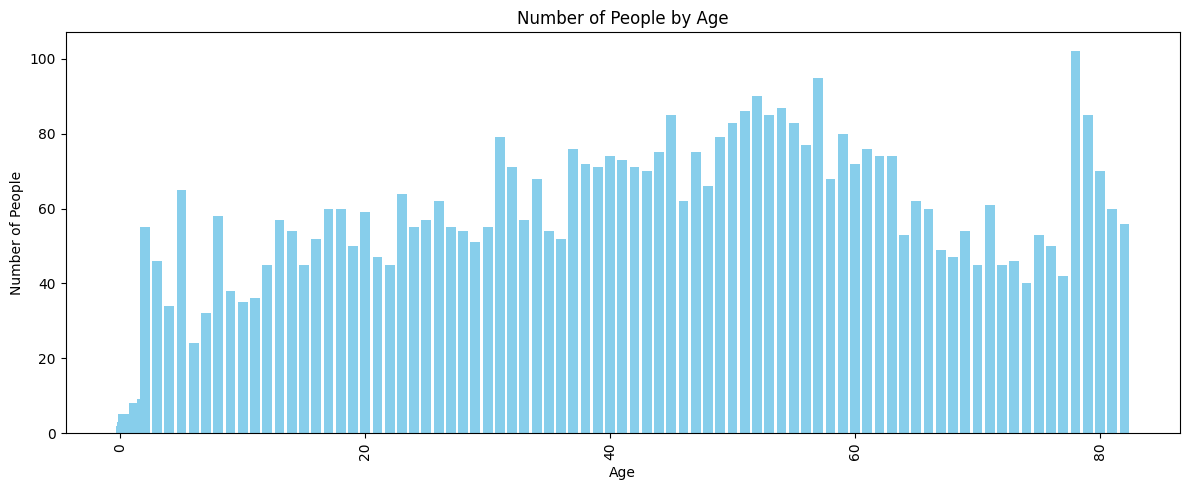

In [ ]:
# Tầng suất của từng độ tuổi
age_counts = df['age'].value_counts().sort_index()  # Sắp xếp theo tuổi tăng dần

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of People by Age')
plt.xticks(rotation=0)  # Xoay nhãn trục X nếu quá nhiều tuổi
plt.tight_layout()
plt.show()


- nhìn vào biểu đồ ta có thể thấy độ tuổi trải dài từ 0-82 tuổi.

   gender  count_gender
0  Female          2994
1    Male          2115
2   Other             1


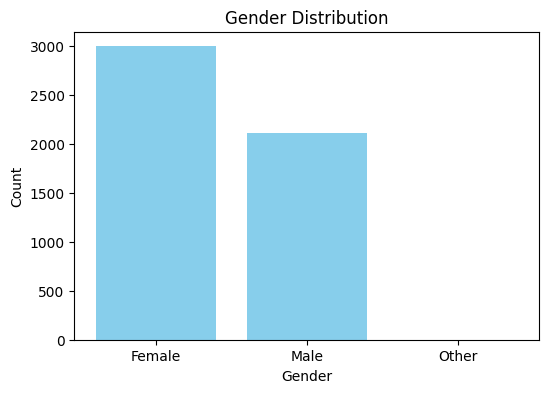

In [ ]:
# xem giới tính
df_gender=df['gender'].value_counts().reset_index(name='count_gender')
print(df_gender)
df_gender.columns = ['gender', 'count_gender']

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
plt.bar(df_gender['gender'], df_gender['count_gender'], color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

- giới tính nam chiếm 58%, giới tính nữ ít hơn giới tính nam, chiếm: 41%
- 'Other': chỉ có 1 giá trị => loại bỏ mà không ảnh hưởng nhiều tới dữ liệu.

   hypertension  count_hypertension
0             0                4612
1             1                 498


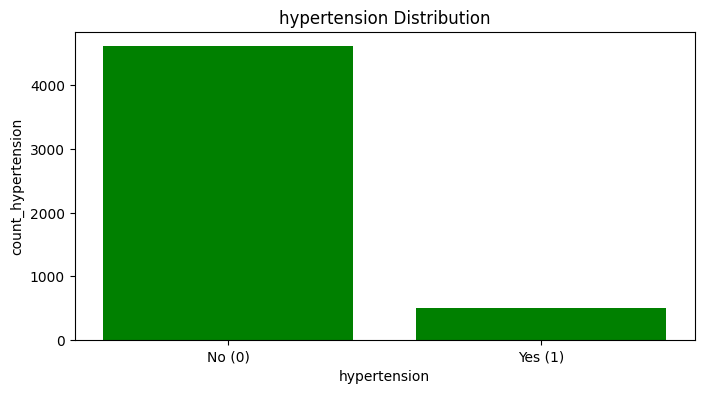

In [ ]:
#xem hypertension
df_hypertension=df['hypertension'].value_counts().reset_index(name='count_hypertension')
print(df_hypertension)
df_hypertension.columns = ['hypertension', 'count_hypertension']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 4
                    ))
plt.bar(df_hypertension['hypertension'], df_hypertension['count_hypertension'], color='green')
plt.xlabel('hypertension')
plt.ylabel('count_hypertension')
plt.title('hypertension Distribution')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

- số lượng người không bị tăng huyết áp nhiều hơn gấp 9.2 lần so với những người bị tăng huyết áp.

   heart_disease  count_heart_disease
0              0                 4834
1              1                  276


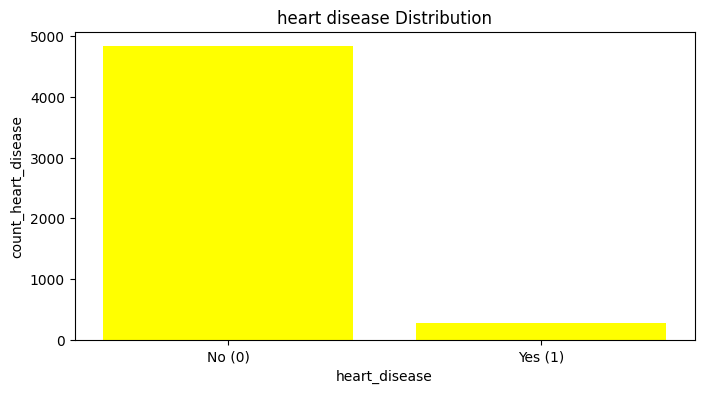

In [ ]:
# xem heart
df_heart_disease=df['heart_disease'].value_counts().reset_index(name='count_heart_disease')
print(df_heart_disease)
df_heart_disease.columns = ['heart_disease', 'count_heart_disease']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 4))
plt.bar(df_heart_disease['heart_disease'], df_heart_disease['count_heart_disease'], color='yellow')
plt.xlabel('heart_disease')
plt.ylabel('count_heart_disease')
plt.title('heart disease Distribution')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

- số lượng người bị bệnh tim nhiều gấp: 17.5 lần so với những người mắc bệnh tim.

  ever_married  count_ever_married
0          Yes                3353
1           No                1757


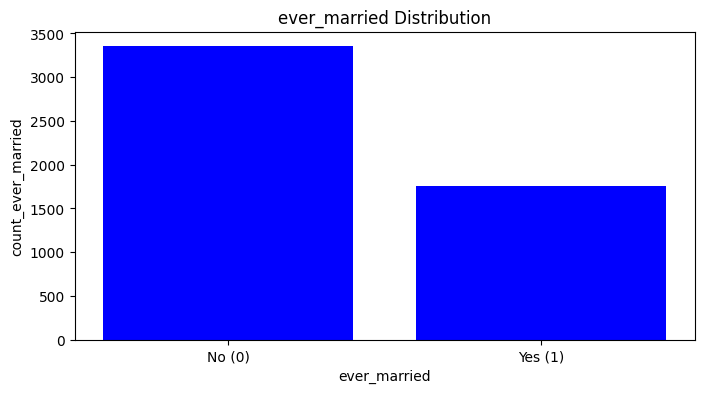

In [ ]:
# xem married
df_married=df['ever_married'].value_counts().reset_index(name='count_ever_married')
print(df_married)
df_married.columns = ['ever_married', 'count_ever_married']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 4))
plt.bar(df_married['ever_married'], df_married['count_ever_married'], color='blue')
plt.xlabel('ever_married')
plt.ylabel('count_ever_married')
plt.title('ever_married Distribution')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

- Số lượng người chưa từng kết hôn nhiều hơn gần gấp đôi số lượng người đã kết hôn.

In [175]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

       work_type  count_work_type
0        Private             2925
1  Self-employed              819
2       children              687
3       Govt_job              657
4   Never_worked               22


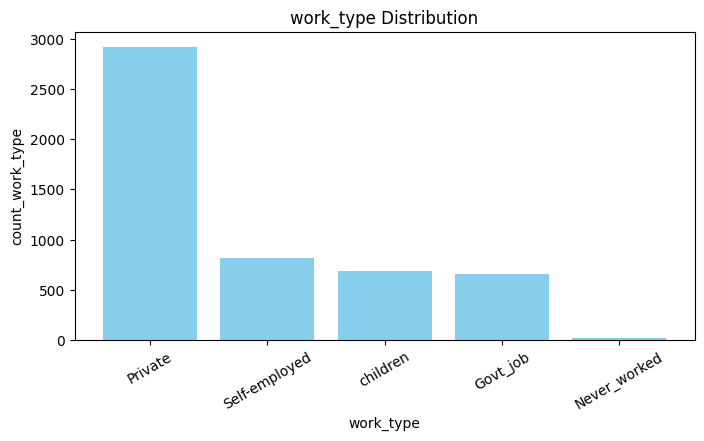

In [ ]:
df_work = df['work_type'].value_counts().reset_index(name='count_work_type')
print(df_work)
df_work.columns = ['work_type', 'count_work_type']

plt.figure(figsize=(8, 4))
plt.bar(df_work['work_type'], df_work['count_work_type'], color='skyblue')
plt.xlabel('work_type')
plt.ylabel('count_work_type')
plt.title('work_type Distribution')
plt.xticks(rotation=0)
plt.show()

- số lượng người làm công việc 'Private' cao vượt trội(2925) so với phần còn lại, và thấp nhất thuộc nhóm 'Never_worked': 22 người.

  Residence_type  count_residence
0          Urban             2596
1          Rural             2514


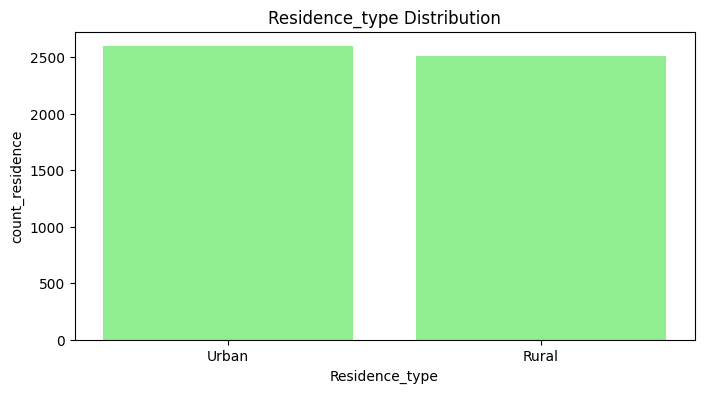

In [ ]:
df_residence = df['Residence_type'].value_counts().reset_index(name='count_residence')
print(df_residence)
df_residence.columns = ['Residence_type', 'count_residence']

plt.figure(figsize=(8, 4))
plt.bar(df_residence['Residence_type'], df_residence['count_residence'], color='lightgreen')
plt.xlabel('Residence_type')
plt.ylabel('count_residence')
plt.title('Residence_type Distribution')
plt.show()

- số người sống ở các khu vực 'Urban' và 'Rural' là gần như sau.

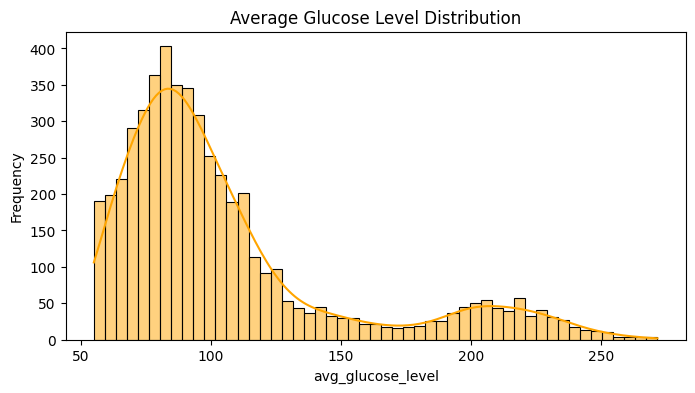

In [178]:
plt.figure(figsize=(8, 4))
sns.histplot(df['avg_glucose_level'], kde=True, color='orange')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.title('Average Glucose Level Distribution')
plt.show()

- Biểu đồ thể hiện phân bố mức đường huyết trung bình (`avg_glucose_level`) của các đối tượng. Dữ liệu có dạng **phân bố lệch phải** (right-skewed), tập trung nhiều nhất trong khoảng **70–120 mg/dL**, sau đó giảm dần về tần suất. Có một số đỉnh nhỏ phụ ở khoảng **200–230 mg/dL**, gợi ý sự tồn tại của các nhóm dân số khác biệt hoặc ngoại lệ y tế.

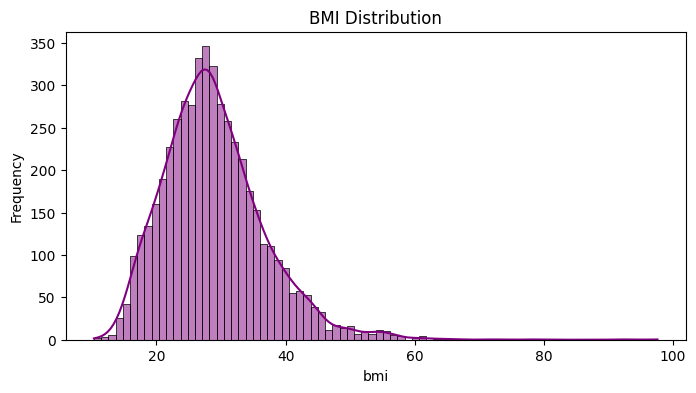

In [179]:
plt.figure(figsize=(8, 4))
sns.histplot(df['bmi'], kde=True, color='purple')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()


- Biểu đồ mô tả phân bố chỉ số khối cơ thể (`bmi`) của các đối tượng. Dữ liệu có dạng **phân bố lệch phải nhẹ** với phần lớn giá trị tập trung trong khoảng **20–35**. Đỉnh phân bố nằm quanh **25**, tương ứng với ngưỡng bình thường/cận thừa cân theo chuẩn y tế. Một số giá trị cao bất thường trên **60** xuất hiện với tần suất rất thấp, có thể là **ngoại lệ** hoặc dữ liệu cần xem xét thêm.


   stroke  count_stroke
0       0          4861
1       1           249


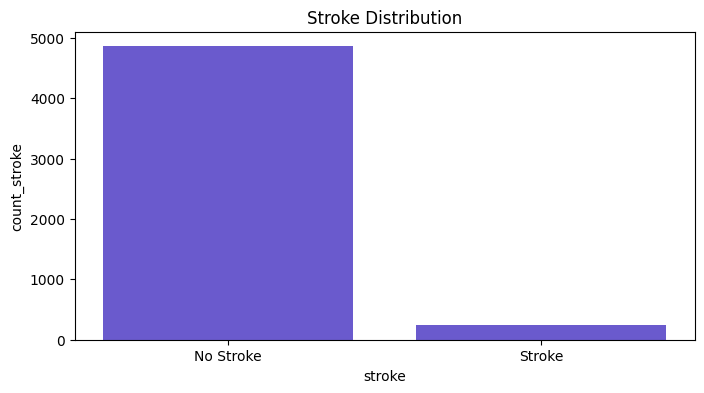

In [ ]:
df_stroke = df['stroke'].value_counts().reset_index(name='count_stroke')
print(df_stroke)
df_stroke.columns = ['stroke', 'count_stroke']
plt.figure(figsize=(8, 4))
plt.bar(df_stroke['stroke'], df_stroke['count_stroke'], color='slateblue')
plt.xlabel('stroke')
plt.ylabel('count_stroke')
plt.title('Stroke Distribution')
plt.xticks([0, 1], ['No Stroke', 'Stroke'])
plt.show()

- Biểu đồ cho thấy sự mất cân đối nghiêm trọng giữa hai nhãn `Stroke` và `No Stroke`. Số lượng mẫu không bị đột quỵ **vượt trội** so với số lượng ca đột quỵ (gần như gấp 20 lần), gây ra hiện tượng **mất cân bằng nhãn (label imbalance)**. Điều này có thể khiến mô hình học máy **thiên lệch** và **giảm độ nhạy (recall)** với các ca đột quỵ – vốn là nhóm quan trọng cần phát hiện.

- **Giải pháp đề suất:** Sử dụng **SMOTE (Synthetic Minority Over-sampling Technique)** để **tăng cường dữ liệu thiểu số**, giúp cân bằng phân bố nhãn và cải thiện hiệu quả mô hình.


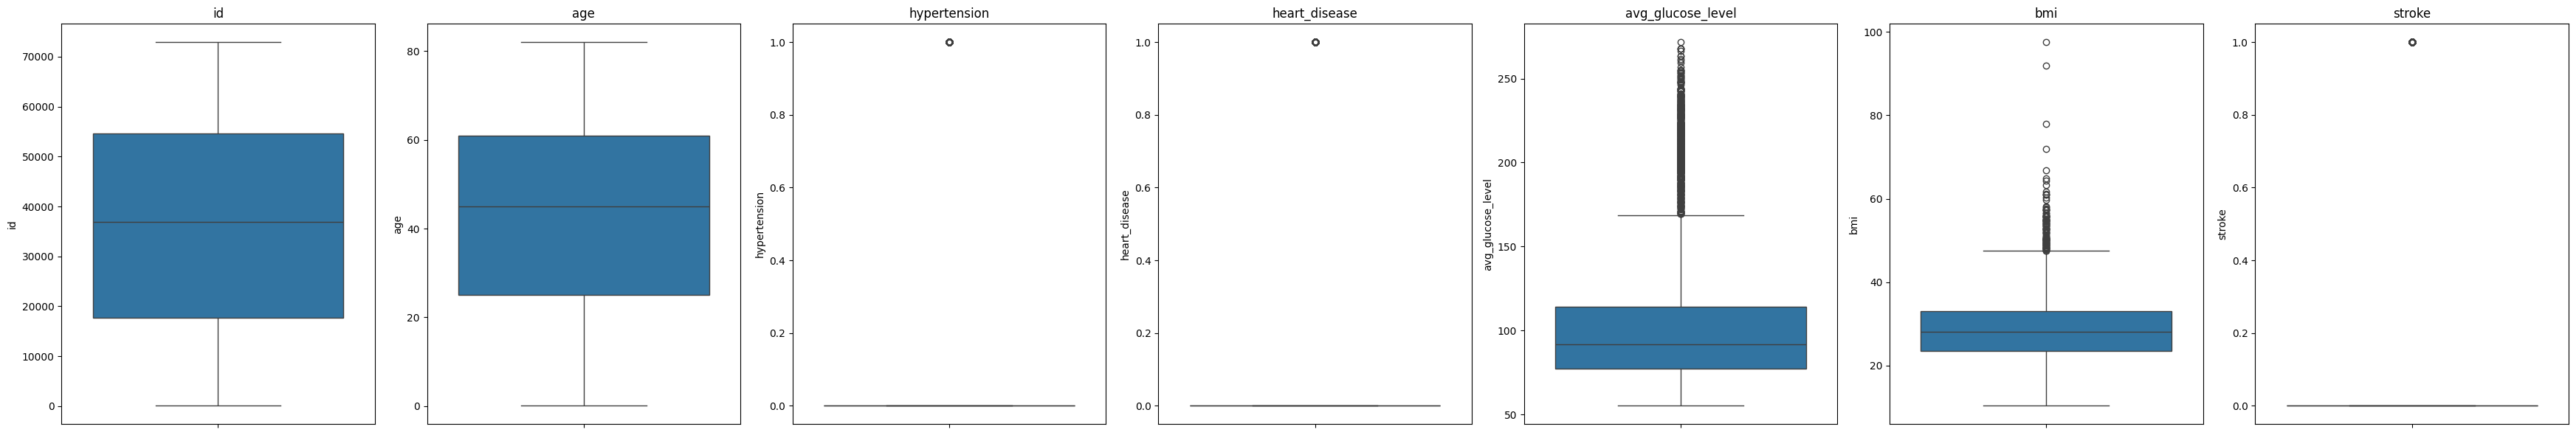

In [181]:
# kiểm tra giá trị ngoại lai cho từng cột vẽ trên biểu đồ boxplot dùng enumarate để duyệt qua các cộtimport pandas as pd
# Tạo figure với đủ subplots cho từng cột
# Lọc các cột số
num_cols = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(5 * len(num_cols), 6))

# Nếu chỉ có 1 cột, axes sẽ không phải là mảng -> chuyển thành list
if len(num_cols) == 1:
    axes = [axes]

for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

**Outlier `avg_glucose_level` and `bmi`**

- Biểu đồ hộp cho thấy cả hai biến `avg_glucose_level` và `bmi` đều chứa **nhiều ngoại lệ (outliers)** vượt xa so với phần còn lại của phân bố. Những giá trị này có thể gây ảnh hưởng tiêu cực đến hiệu quả mô hình nếu không được xử lý phù hợp.

- **Định hướng xử lý**: Không sử dụng ngưỡng cắt máy móc, mà dựa vào **biến động sinh lý và kiến thức y khoa**:

- **BMI** hợp lý thường nằm trong khoảng **13–60**, ngoài khoảng này thường do **nhập liệu sai** hoặc các ca cực đoan hiếm gặp.
- **Mức glucose trung bình** hợp lệ được giữ trong khoảng **50–250 mg/dL**, tương ứng với ngưỡng sinh học có thể xảy ra trên thực tế lâm sàng.

- Các outlier nằm ngoài các khoảng giá trị này đã được **loại bỏ thủ công** có cơ sở, giúp làm sạch dữ liệu mà vẫn giữ nguyên tính đại diện của mẫu.

##  tiền xử lý dữ liệu

In [11]:
# xử lý thiếu
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

D:\temp\ipykernel_14784\2614125662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [13]:
#kiểm tra xử lý giá trị thiếu
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

xử lý cột age

In [14]:
# chuyển cột age về dạng số nguyên
df['age'] = df['age'].astype(int)

xử lý cột work_type

In [15]:
# Chuẩn hóa: chuyển về chữ thường và loại bỏ khoảng trắng đầu/cuối
df['work_type'] = df['work_type'].str.strip().str.lower()

In [17]:
df['work_type'].unique() # kiểm tra lại sau khi xử lý.

array(['private', 'self-employed', 'govt_job', 'children', 'never_worked'],
      dtype=object)

xử lý cột gender

In [18]:
# xóa giá trị other trong cột 'gender'
df = df[df['gender'] != 'Other']

In [19]:
print(df['gender'].unique())

['Male' 'Female']


xử lý cột smoking_status

In [20]:
# Tạo bins tuổi
bins = [0, 18, 50, 82]
labels = ['child', 'adult', 'senior']

df_known = df[df['smoking_status'] != 'Unknown'].copy()
df_known['age_bin'] = pd.cut(df_known['age'], bins=bins, labels=labels, right=True)

# Xem phân bố từng nhóm trong mỗi age bin
pd.crosstab(df_known['age_bin'], df_known['smoking_status'], normalize='index') * 100

# Tạo age_bin cho nhóm Unknown
df_unknown = df[df['smoking_status'] == 'Unknown'].copy()
df_unknown['age_bin'] = pd.cut(df_unknown['age'], bins=bins, labels=labels, right=True)


def assign_smoking_status(row):
    age_bin = row['age_bin']
    if age_bin == 'child':
        return np.random.choice(['never smoked', 'smokes', 'formerly smoked'], p=[0.95, 0.04, 0.01])
    elif age_bin == 'adult':
        return np.random.choice(['never smoked', 'smokes', 'formerly smoked'], p=[0.35, 0.5, 0.15])
    elif age_bin == 'senior':
        return np.random.choice(['never smoked', 'smokes', 'formerly smoked'], p=[0.2, 0.1, 0.7])
    else:
        return 'never smoked'  # fallback

# Áp dụng gán
df_unknown['smoking_status_imputed'] = df_unknown.apply(assign_smoking_status, axis=1)

- Hàm này được dùng để **gán lại giá trị `smoking_status` cho các dòng có giá trị "Unknown"**, dựa trên nhóm tuổi (`age_bin`) và phân bố xác suất hợp lý.

**Cơ chế hoạt động:**
- **Input:** Một dòng dữ liệu (`row`) có chứa thông tin `age_bin` (child, adult, senior).
- **Output:** Một giá trị `smoking_status` được chọn ngẫu nhiên từ 3 lựa chọn: 
  - `'never smoked'`
  - `'smokes'`
  - `'formerly smoked'`

**Xác suất phân bố theo nhóm tuổi:**
| Nhóm tuổi (`age_bin`) | never smoked | smokes | formerly smoked |
|------------------------|---------------|--------|------------------|
| `child`               | 95%          | 4%     | 1%               |
| `adult`               | 35%          | 50%    | 15%              |
| `senior`              | 20%          | 10%    | 70%              |

**Mục đích:**
- **Ước lượng lại giá trị `smoking_status` cho các dòng bị thiếu (`Unknown`)** mà **không làm mất dữ liệu**.
- Giúp mô hình hóa hiệu quả hơn bằng cách **giữ nguyên số lượng quan sát** và sử dụng thông tin tuổi để gán hợp lý.

In [21]:
# Cập nhật giá trị suy đoán
df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = df_unknown['smoking_status_imputed']

In [22]:
smoking_status = df['smoking_status'].value_counts().reset_index(name='count_smoking_status')
smoking_status

,smoking_status,count_smoking_status
0,never smoked,2815
1,formerly smoked,1214
2,smokes,1080


xử lý cột avg_glucose_level

In [24]:
df = df[df['avg_glucose_level'] <= 250]

In [25]:
df['avg_glucose_level'].describe()

count    5084.000000
mean      105.394231
std        44.122678
min        55.120000
25%        77.150000
50%        91.685000
75%       113.585000
max       249.310000
Name: avg_glucose_level, dtype: float64

<Axes: xlabel='avg_glucose_level'>

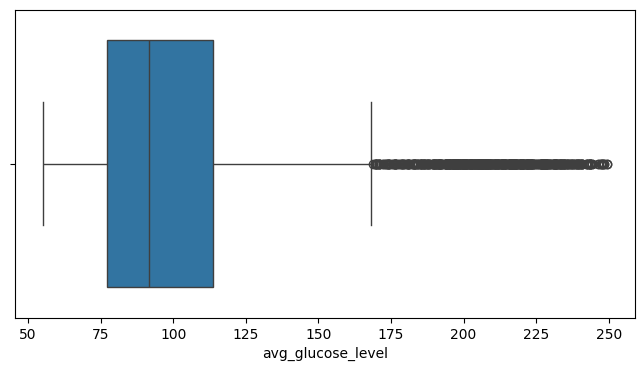

In [26]:
# vẽ boxplot cho cột avg_glucose_level
df_glucose=df['avg_glucose_level']
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_glucose)

xử lý cột bmi

In [28]:
df = df[(df['bmi'] > 13) & (df['bmi'] < 60)]

In [29]:
df['bmi'].describe()

count    5064.000000
mean       28.803466
std         7.388641
min        13.200000
25%        23.800000
50%        28.400000
75%        32.800000
max        59.700000
Name: bmi, dtype: float64

<Axes: xlabel='bmi'>

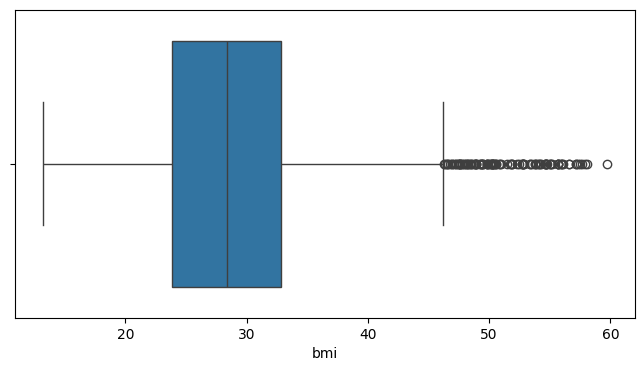

In [30]:
# vẽ biểu đồ boxplot cho cột bmi sau xử lý
df_bmi=df['bmi']
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_bmi)

**Outliers in `avg_glucose_level` and `bmi`: Are They Bad?**

- Các giá trị ngoại lai (outliers) được hiển thị trong hai biểu đồ boxplot không nhất thiết là "xấu" hay sai lệch. Trên thực tế, chúng **phản ánh đúng sự đa dạng sinh học và tình trạng sức khỏe thực tế** trong dân số:

- **Chỉ số glucose cao** có thể đến từ các bệnh nhân **tiểu đường type 2 hoặc rối loạn đường huyết**, hoàn toàn hợp lý trong bối cảnh dữ liệu y tế.
- **BMI cao vượt chuẩn** thường xuất hiện ở các trường hợp **béo phì cấp độ cao**, và vẫn nằm trong giới hạn sinh lý có thể xảy ra.

- Do đó, thay vì loại bỏ hoàn toàn, các outlier này **có thể được giữ lại**, miễn là được xác nhận là **hợp lệ về mặt nghiệp vụ y khoa**, nhằm đảm bảo mô hình học được từ các trường hợp đặc biệt có ý nghĩa.

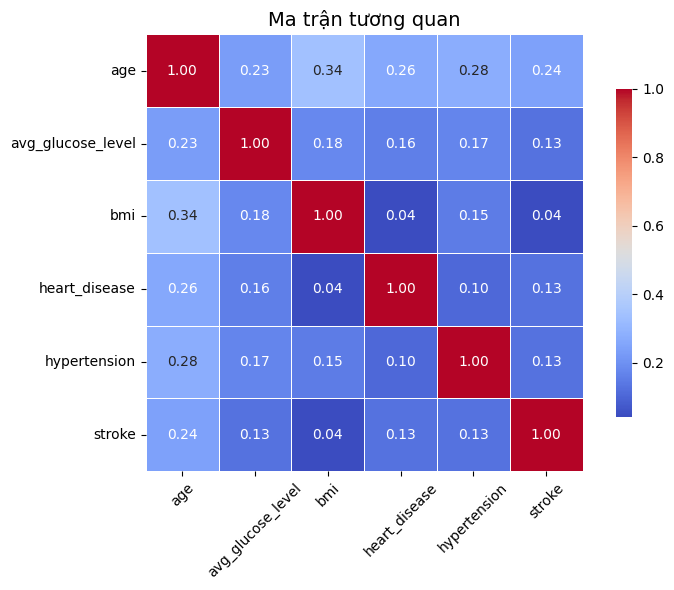

In [32]:
# vẽ biểu đồ tương quan cho dataframe
# Tính hệ số tương quan Pearson giữa các cột số
num_cols = df.select_dtypes(include='number').columns.difference(['id'])
correlation_matrix = df[num_cols].corr(method='pearson')
# Vẽ biểu đồ heatmap cho ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,             # hiển thị giá trị số
    fmt=".2f",              # định dạng số
    cmap='coolwarm',        # màu sắc
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .75}
)
plt.title("Ma trận tương quan", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Các hệ số tương quan đều **thấp (< 0.35)**, cho thấy các biến đầu vào **không bị đa cộng tuyến nghiêm trọng**.
- Biến `age` có mức tương quan tương đối cao nhất với `stroke` (`0.24`), nhưng vẫn ở mức yếu → cần thêm đặc trưng hoặc tổ hợp đặc trưng mới để mô hình hóa tốt hơn.
- `bmi`, `heart_disease`, `hypertension`, và `avg_glucose_level` có tương quan rất thấp với `stroke`.

**Đề xuất**:
- Giữ nguyên các biến vì mỗi biến vẫn có giá trị mô tả riêng.
- Kết hợp với các kỹ thuật chọn đặc trưng (feature selection) như **RFE** hoặc **tree-based feature importance** để đánh giá mức đóng góp thực tế.

In [33]:
# mã hóa cột dữ liệu phân loại sang dữ liệu số
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,3,1,228.69,36.600000,0,1
1,51676,0,61,0,0,1,4,0,202.21,28.893237,1,1
2,31112,1,80,0,1,1,3,0,105.92,32.500000,1,1
3,60182,0,49,0,0,1,3,1,171.23,34.400000,2,1
4,1665,0,79,1,0,1,4,0,174.12,24.000000,1,1


**Label Encoding – Mã hóa biến phân loại**

**Mục đích:**  
Chuyển các cột phân loại (chuỗi) thành dạng số để mô hình học máy hiểu được.

---

**Ưu điểm:**
- Đơn giản, nhanh, dễ triển khai.
- Phù hợp với các mô hình **tree-based** (Random Forest, XGBoost…).

---

**Nhược điểm:**
- Gán số theo thứ tự → có thể gây **hiểu nhầm về mối quan hệ thứ bậc** giữa các nhãn.
- Không phù hợp cho các mô hình tuyến tính (Linear/Logistic Regression) vì dễ gây sai lệch.

# chia data thành 2 tập train/test trước khi sử lí mất cần bằng nhãn bằng SMOTE

In [41]:
# Tách feature (X) và target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
# Kiểm tra phân bố ban đầu của cột 'stroke'
print("Phân bố ban đầu của cột 'stroke':")
print(y.value_counts())
print("\n")

# Áp dụng SMOTE lên X_train
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra phân bố sau khi áp dụng SMOTE
print("Phân bố sau khi áp dụng SMOTE:")
print(y_train_resampled.value_counts())

Phân bố ban đầu của cột 'stroke':
stroke
0    4820
1     244
Name: count, dtype: int64


Phân bố sau khi áp dụng SMOTE:
stroke
0    3856
1    3856
Name: count, dtype: int64


**SMOTE – Xử lý mất cân bằng dữ liệu (imbalanced data)**

**Mục tiêu:**  
Tăng số lượng mẫu ở lớp thiểu số (`stroke = 1`) để cân bằng với lớp đa số, giúp mô hình học tốt hơn và không bị thiên lệch.

---

**Vấn đề ban đầu:**
- Cột `stroke` bị **mất cân bằng nghiêm trọng** (tỷ lệ bị đột quỵ rất nhỏ).
- Gây ảnh hưởng tiêu cực đến hiệu suất mô hình, dễ dự đoán lệch về lớp 0.

---

**Giải pháp – SMOTE (Synthetic Minority Over-sampling Technique):**
- Tạo thêm **mẫu tổng hợp** cho lớp thiểu số bằng cách **nội suy** giữa các điểm gần nhau.
- Không làm mất dữ liệu gốc.

---

**Lợi ích:**
- Cân bằng tập dữ liệu giúp mô hình **không bị thiên lệch**.
- Cải thiện độ nhạy (recall) với lớp thiểu số.

---

**Lưu ý:**
- Nên áp dụng **sau khi chia tập huấn luyện**, để tránh **data leakage**.
- Không phù hợp với dữ liệu nhiễu, vì có thể tạo ra điểm không thực tế.

In [ ]:
# 3. Chuẩn hóa trên X_train_resampled, rồi transform X_test
scaler = StandardScaler()
X_train_resampled[numerical_cols_to_scale] = scaler.fit_transform(X_train_resampled[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

In [43]:
# chuẩn hóa các cột số về cùng một thang đo
# Chọn các cột số cần chuẩn hóa
numerical_cols_to_scale = ['age', 'avg_glucose_level', 'bmi'] # Thêm các cột số khác nếu có

# Khởi tạo đối tượng StandardScaler để chuẩn hóa dữ liệu
scaler = StandardScaler()

# Fit scaler trên tập huấn luyện đã qua SMOTE và transform dữ liệu này
# Đảm bảo không có "data leakage" từ tập test
X_train_resampled[numerical_cols_to_scale] = scaler.fit_transform(X_train_resampled[numerical_cols_to_scale])

# Áp dụng cùng scaler để transform tập test (dùng mean và std từ tập huấn luyện)
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

**Chuẩn hóa dữ liệu với `StandardScaler`**

**Mục tiêu:**  
Đưa các cột số (`age`, `avg_glucose_level`, `bmi`) về cùng một thang đo để mô hình học tốt hơn.

---

**Tại sao cần chuẩn hóa?**
- Các biến số thường có **đơn vị đo khác nhau** (tuổi, đường huyết, BMI…).
- Một số mô hình **nhạy cảm với độ lớn của dữ liệu** (như KNN, SVM, Logistic Regression).
- Giúp **tăng tốc độ huấn luyện** và **cải thiện độ ổn định** của mô hình.

---

**Phương pháp: `StandardScaler`**
- Biến đổi mỗi giá trị thành:
  
  \[
  z = \frac{x - \mu}{\sigma}
  \]
  
  với:  
  - \( \mu \): trung bình  
  - \( \sigma \): độ lệch chuẩn  

- Kết quả: Dữ liệu có **trung bình = 0**, **độ lệch chuẩn = 1**.

---

**Lưu ý:**
- Phải `fit` scaler **trên dữ liệu huấn luyện**, sau đó mới `transform` dữ liệu test.
- Trong ví dụ này, scaler được `fit` trên tập đã qua SMOTE để tránh **data leakage**.


In [44]:
X_train_resampled.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,16377,1,0.673854,0,0,1,3,1,-0.588891,0.828470,0
1,26862,0,-0.624027,0,0,1,1,0,-0.796781,0.213956,0
2,57288,0,1.091029,0,0,1,3,0,-0.367661,1.112091,1
3,22896,0,-0.021439,0,0,1,3,0,-0.174137,2.246578,0
4,42159,0,1.230088,1,0,1,4,1,1.302642,1.127848,1


In [45]:
X_test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3213,32602,1,1.091029,0,1,1,4,1,-0.615364,0.198199,0
185,41081,1,0.395736,0,0,1,3,0,0.401101,0.340010,0
3777,47563,0,-1.736496,0,0,0,3,0,-1.007544,0.875740,1
1901,56019,0,-1.597437,0,0,0,3,1,-0.843982,-0.526612,1
5060,60271,1,1.091029,0,0,1,3,1,-1.180751,0.024875,0
